In [1]:
import pandas as pd


In [6]:

df = pd.read_csv(r"C:\Users\lenovo\Desktop\covid19-global-tracke\data\owid-covid-data.csv")

In [19]:
print(df.shape)
print(df.columns)
df.head()
df.isnull().sum().sort_values(ascending=False)


(429435, 67)
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothe

weekly_icu_admissions_per_million          418442
weekly_icu_admissions                      418442
excess_mortality_cumulative_per_million    416024
excess_mortality                           416024
excess_mortality_cumulative                416024
                                            ...  
total_deaths                                17631
population                                      0
date                                            0
location                                        0
iso_code                                        0
Length: 67, dtype: int64

In [20]:
df['date'] = pd.to_datetime(df['date'])

In [21]:
countries = ['India', 'United States', 'Kenya']

In [22]:
df_filtered = df[df['location'].isin(countries)].copy()

In [23]:
df_filtered.fillna(0, inplace=True)

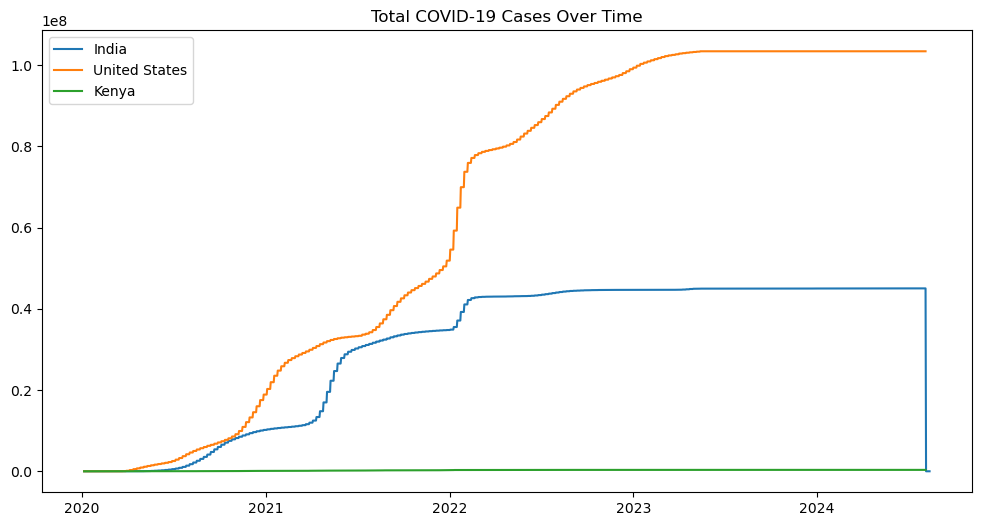

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
for country in countries:
    country_df = df_filtered[df_filtered['location'] == country]
    plt.plot(country_df['date'], country_df['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.legend()
plt.show()


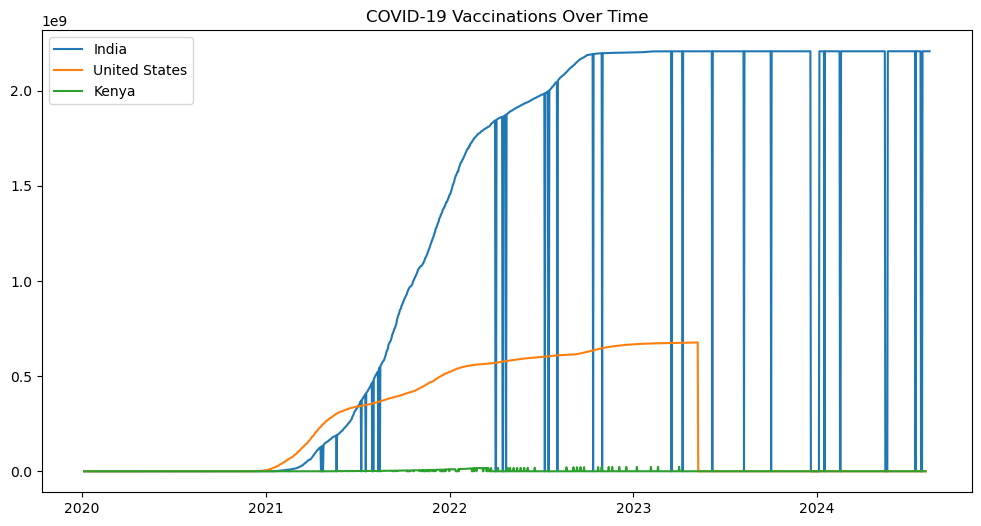

In [25]:
plt.figure(figsize=(12,6))
for country in countries:
    country_df = df_filtered[df_filtered['location'] == country]
    plt.plot(country_df['date'], country_df['total_vaccinations'], label=country)

plt.title("COVID-19 Vaccinations Over Time")
plt.legend()
plt.show()


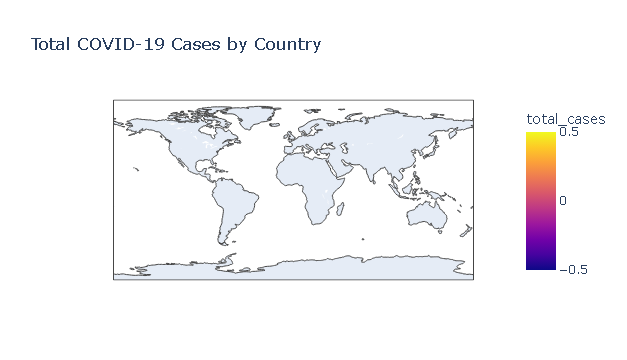

In [27]:
import plotly.express as px

latest = df[df['date'] == df['date'].max()]
fig = px.choropleth(
    latest,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    title='Total COVID-19 Cases by Country',
)
fig.show()
